In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.sample(10).style.background_gradient(cmap='rainbow')

,Unnamed: 0,TV,Radio,Newspaper,Sales
4,5,180.800000,10.800000,58.400000,12.900000
136,137,25.600000,39.000000,9.300000,9.500000
152,153,197.600000,23.300000,14.200000,16.600000
116,117,139.200000,14.300000,25.600000,12.200000
193,194,166.800000,42.000000,3.600000,19.600000
56,57,7.300000,28.100000,41.400000,5.500000
17,18,281.400000,39.600000,55.800000,24.400000
61,62,261.300000,42.700000,54.700000,24.200000
23,24,228.300000,16.900000,26.200000,15.500000
88,89,88.300000,25.500000,73.400000,12.900000


In [5]:
df.shape

(200, 5)

In [6]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.describe().style.background_gradient(cmap='plasma')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

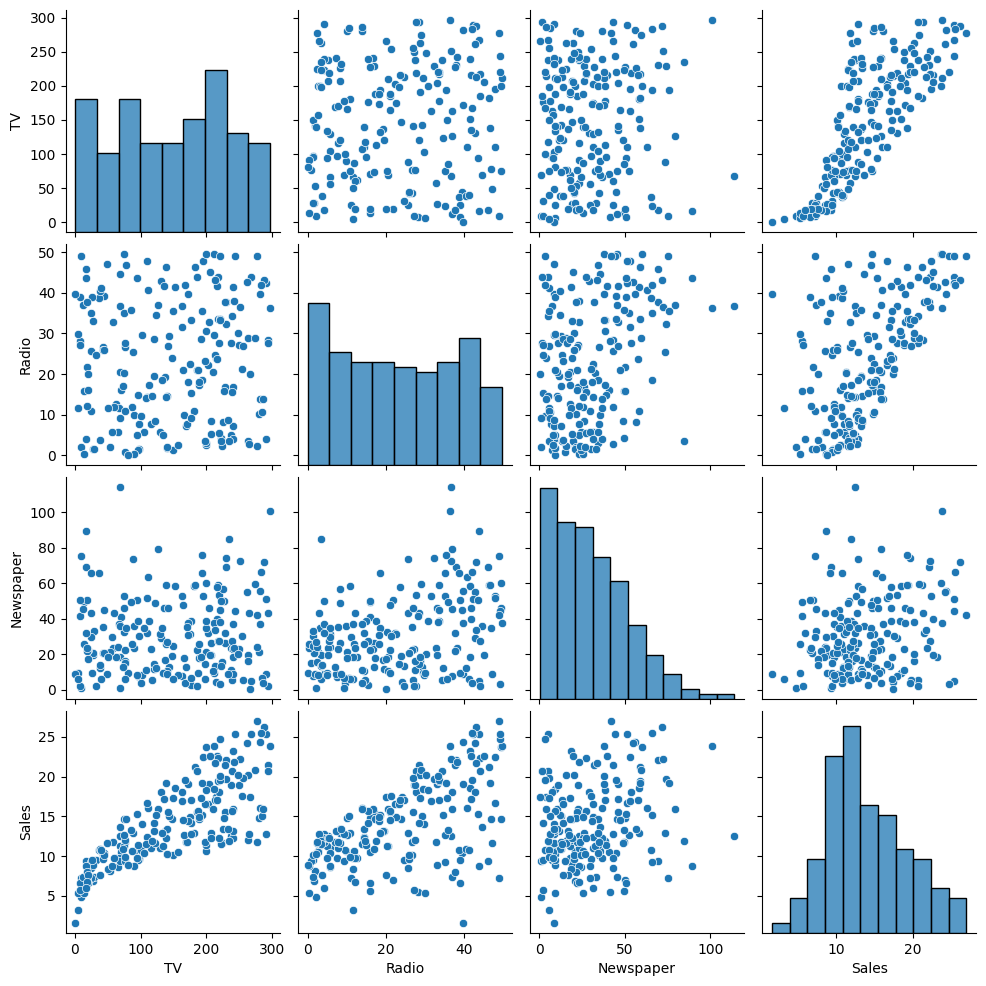

In [12]:
sns.pairplot(df, palette='husl')

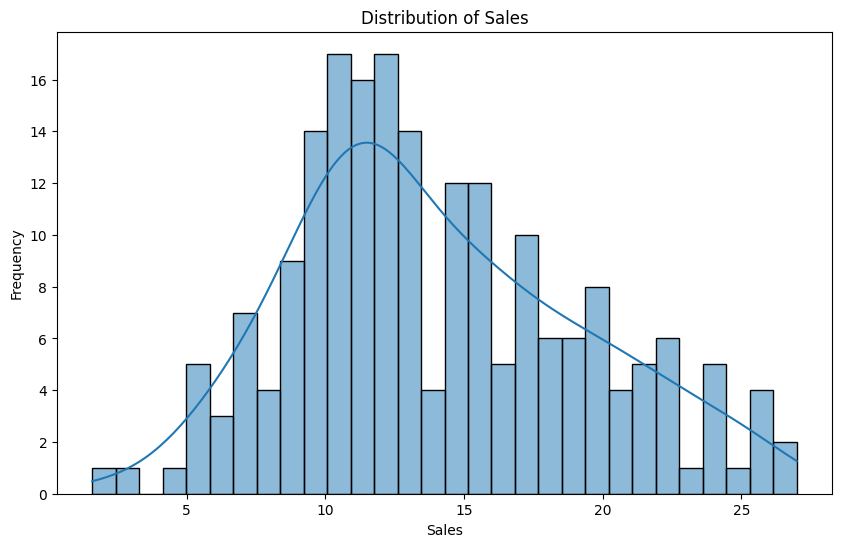

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

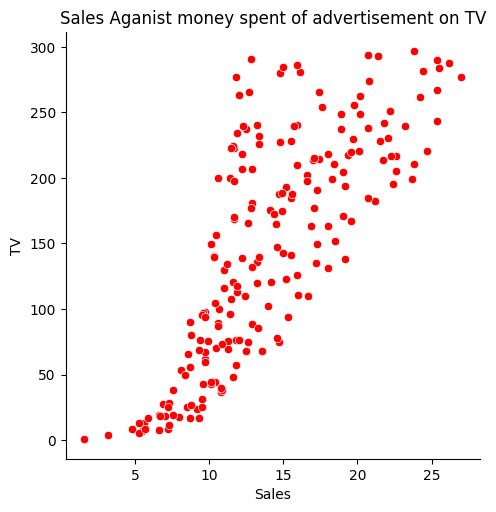

In [14]:
sns.relplot(x="Sales",y="TV",data=df,color='red',palette='muted')
plt.title('Sales Aganist money spent of advertisement on TV')
plt.show()

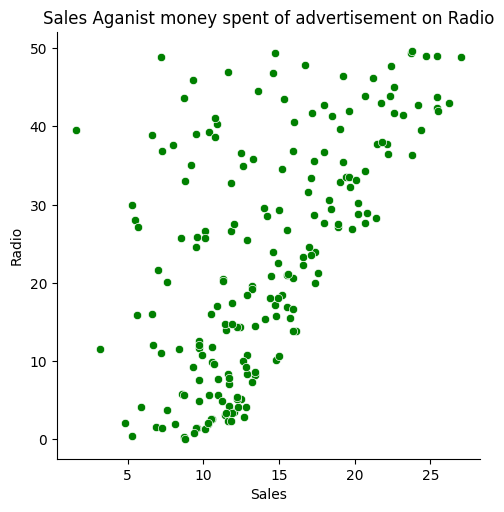

In [15]:
sns.relplot(x="Sales",y="Radio",data=df,color='green',palette='muted')
plt.title('Sales Aganist money spent of advertisement on Radio')
plt.show()

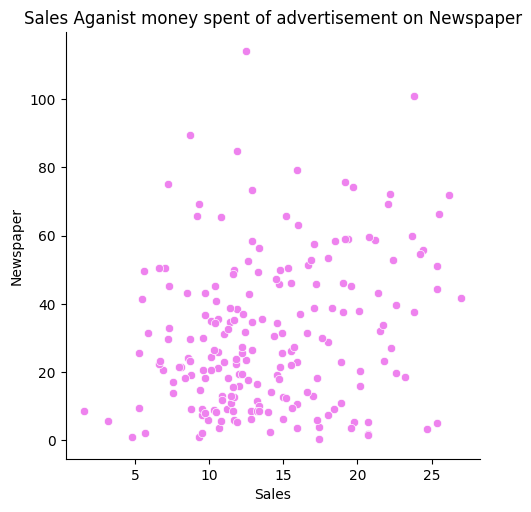

In [16]:
sns.relplot(x="Sales",y="Newspaper",data=df,color='violet',palette='muted')
plt.title('Sales Aganist money spent of advertisement on Newspaper')
plt.show()

<Axes: >

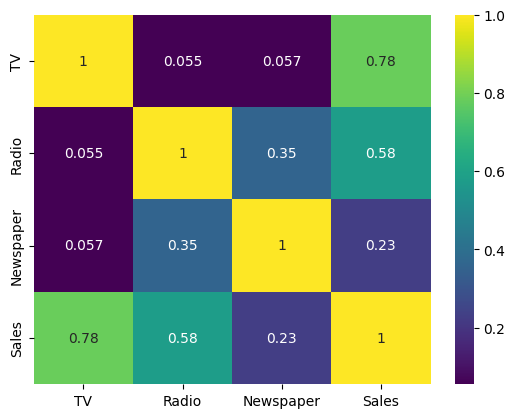

In [17]:
cor_mat = df[["TV", "Radio", "Newspaper", "Sales"]].corr()
sns.heatmap(cor_mat, annot=True,cmap='viridis')

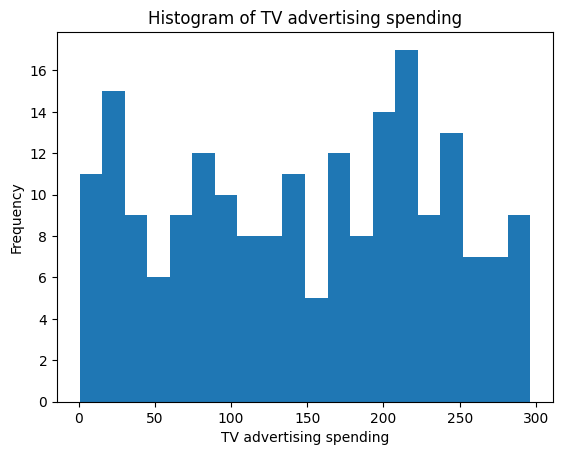

In [18]:
plt.hist(df['TV'],bins=20)
plt.xlabel('TV advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of TV advertising spending')
plt.show()

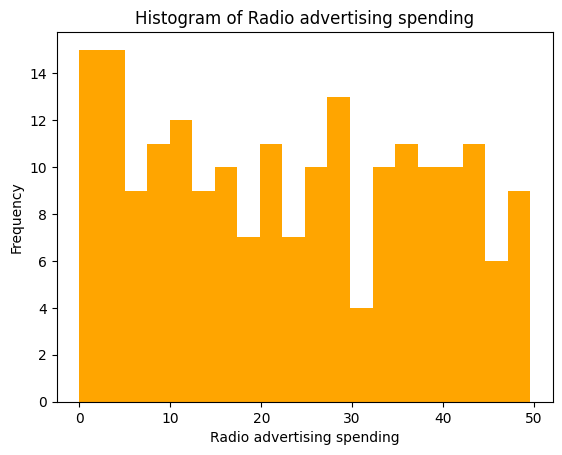

In [19]:
plt.hist(df['Radio'],bins=20,color='orange')
plt.xlabel('Radio advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of Radio advertising spending')
plt.show()

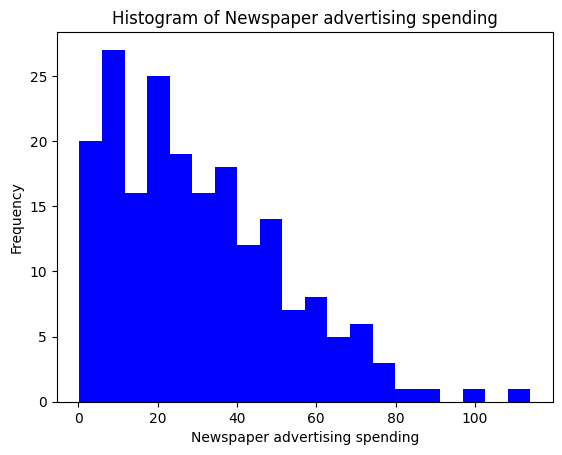

In [20]:
plt.hist(df['Newspaper'],bins=20,color='blue')
plt.xlabel('Newspaper advertising spending')
plt.ylabel('Frequency')
plt.title('Histogram of Newspaper advertising spending')
plt.show()

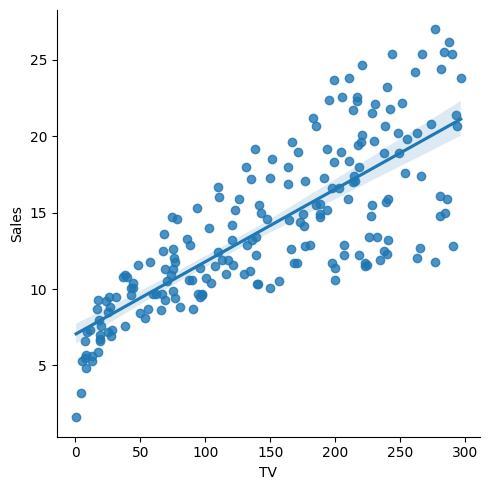

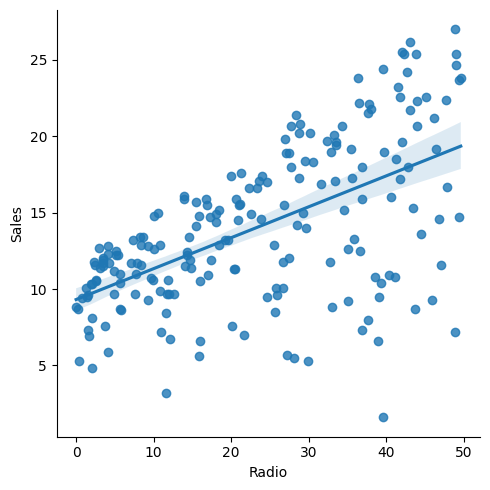

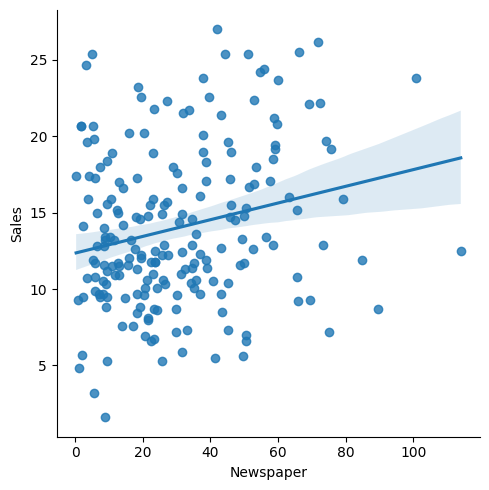

In [21]:
sns.lmplot(x='TV', y='Sales', data=df)
sns.lmplot(x='Radio', y='Sales', data=df)
sns.lmplot(x='Newspaper', y='Sales', data=df)

<Axes: xlabel='Sales'>

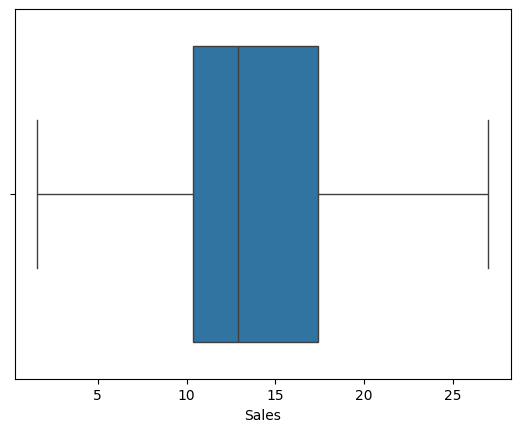

In [22]:
sns.boxplot(x='Sales',data=df)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
y=df['Sales']
x=df.drop('Sales',axis=1)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
lr.score(x_train,y_train)

0.9174361790665879

In [29]:
lr.score(x_test,y_test)

0.8428365067609932

In [31]:
y_predictions=lr.predict(x_test)

In [32]:
y_predictions

array([12.52943603, 12.90500164, 12.01289794, 16.70717578, 23.95188403,
       14.19608662, 20.33917897, 12.14606448, 10.0203687 ,  8.63483473,
       20.00257998, 19.25088653, 12.03073355, 15.21518484, 17.23202244,
        9.73585897, 14.31422327, 16.42245033,  8.97034564, 16.04343773,
        9.927342  , 19.35784163, 14.97895797, 21.05573846, 13.55696279,
       12.15820717, 10.21771816, 18.14417113,  8.08400968, 11.05674605,
       18.80310715,  8.92312465, 17.02273239, 17.72637713, 17.35016651,
       11.34563168, 14.33301416, 21.20597097, 12.13700644, 23.34191508,
       11.92756656,  6.65659317, 21.26531171,  9.24129936, 21.54612433,
       14.06849886, 16.62042349, 15.57016279, 18.2376713 , 12.81039887,
       24.80919317,  8.35021086,  8.74924489, 17.28980138,  8.27256906,
       16.33604777, 13.94814135, 20.74730678,  9.6898133 , 12.02387982])

In [33]:
from sklearn import metrics

print('MAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MAE: 1.4113309752221437
RMSE: 2.067736167919609
R-Squared 0.7908639651884587
